# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing as sk_pp
from sklearn.model_selection import train_test_split

%matplotlib inline

## Get Data

In [2]:
data = pd.read_csv('../../../Data_AA2/bank-additional-full.csv', sep = ';',na_values="unknown")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.dropna(inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

In [5]:
def duration(df):

    df.loc[df['duration'] <= 102, 'duration'] = 1
    df.loc[(df['duration'] > 102) & (df['duration'] <= 180)  , 'duration'] = 2
    df.loc[(df['duration'] > 180) & (df['duration'] <= 319)  , 'duration'] = 3
    df.loc[(df['duration'] > 319) & (df['duration'] <= 644.5), 'duration'] = 4
    df.loc[df['duration']  > 644.5, 'duration'] = 5

    return df

duration(data)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
def age(df):
    df.loc[df['age'] <= 19, 'age'] = 1
    df.loc[(df['age'] > 19) & (df['age'] <= 30), 'age'] = 2
    df.loc[(df['age'] > 30) & (df['age'] <= 60), 'age'] = 3
    df.loc[(df['age'] > 60) & (df['age'] <= 98), 'age'] = 4
           
    return df

age(data)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,3,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['job'] = le.fit_transform(data['job']) 
data['marital'] = le.fit_transform(data['marital']) 
data['education'] = le.fit_transform(data['education']) 
data['default'] = le.fit_transform(data['default']) 
data['housing'] = le.fit_transform(data['housing']) 
data['loan'] = le.fit_transform(data['loan'])
data['contact'] = le.fit_transform(data['contact']) 
data['month'] = le.fit_transform(data['month']) 
data['day_of_week'] = le.fit_transform(data['day_of_week'])
data['poutcome'] = le.fit_transform(data['poutcome'])

data['y'].replace(['no', 'yes'], [0,1], inplace  = True)
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,3,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,3,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,3,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,3,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,2,9,2,5,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,2,7,2,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
11,2,7,2,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
12,2,1,2,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
13,3,3,0,0,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [8]:
from sklearn.model_selection import train_test_split

data_Y = data['y']
data = data.drop(columns=['y']) 

new_data = data.values.reshape(data.shape[0], 1, data.shape[1])

X_train, X_test, Y_train, Y_test = train_test_split( new_data, data_Y, test_size=0.30)
X_train.shape
#Y_train = np.asarray(Y_train).astype('float32').reshape((-1,1))
#Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))

(21341, 1, 20)

In [10]:
Y_train.value_counts()

0    18614
1     2727
Name: y, dtype: int64

In [11]:
Y_train = np.asarray(Y_train).astype('float32').reshape((-1,1))
Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))

In [12]:
X_val, partial_X_train, Y_val, partial_Y_train = train_test_split( X_train, Y_train, test_size=0.50)

# LSTM modelo 1
Defining the model structure

In [18]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing import sequence

model = models.Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(partial_X_train.shape[1], partial_X_train.shape[2])))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

Training the model and plotting errors along the process

In [19]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('best_model_1.h5', monitor='val_loss', mode='min', save_best_only=True)

history = model.fit(partial_X_train,
                    partial_Y_train,
                    epochs=200,
                    batch_size=512,
                    callbacks = [es,mc],
                    validation_data=(X_val, Y_val))

Epoch 1/200
21/21 [==============================] - 5s 62ms/step - loss: 0.6744 - acc: 0.5845 - val_loss: 0.5519 - val_acc: 0.8711
Epoch 2/200
21/21 [==============================] - 0s 8ms/step - loss: 0.5231 - acc: 0.8725 - val_loss: 0.4541 - val_acc: 0.8711
Epoch 3/200
21/21 [==============================] - 0s 7ms/step - loss: 0.4369 - acc: 0.8718 - val_loss: 0.3984 - val_acc: 0.8711
Epoch 4/200
21/21 [==============================] - 0s 6ms/step - loss: 0.3928 - acc: 0.8708 - val_loss: 0.3792 - val_acc: 0.8711
Epoch 5/200
21/21 [==============================] - 0s 7ms/step - loss: 0.3747 - acc: 0.8729 - val_loss: 0.3766 - val_acc: 0.8711
Epoch 6/200
21/21 [==============================] - 0s 7ms/step - loss: 0.3817 - acc: 0.8683 - val_loss: 0.3756 - val_acc: 0.8711
Epoch 7/200
21/21 [==============================] - 0s 7ms/step - loss: 0.3668 - acc: 0.8752 - val_loss: 0.3730 - val_acc: 0.8711
Epoch 8/200
21/21 [==============================] - 0s 7ms/step - loss: 0.3691 - 

In [21]:
model.load_weights('best_model_1.h5')
score = model.evaluate(X_test, Y_test, verbose = 0)

print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.3418068289756775
Test accuracy 0.8867388367652893


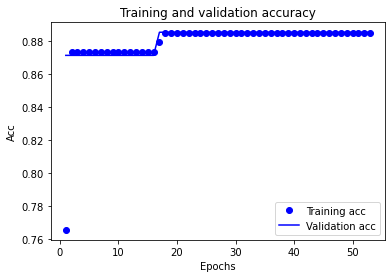

In [22]:
history_dict = history.history
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

# LSTM modelo 2
Defining the model structure

In [23]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing import sequence

model2 = models.Sequential()
model2.add(LSTM(128, input_shape=(partial_X_train.shape[1], partial_X_train.shape[2])))
model2.add(Dense(1, activation='sigmoid'))

Training the model and plotting errors along the process

In [24]:
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', patience=30)
mc = ModelCheckpoint('best_model_2.h5', monitor='val_loss', mode='min', save_best_only=True)

history = model2.fit(partial_X_train,
                    partial_Y_train,
                    epochs=200,
                    batch_size=512,
                    callbacks = [es,mc],
                    validation_data=(X_val, Y_val))

Epoch 1/200
21/21 [==============================] - 0s 13ms/step - loss: 0.3471 - acc: 0.8848 - val_loss: 0.3502 - val_acc: 0.8851
Epoch 2/200
21/21 [==============================] - 0s 10ms/step - loss: 0.3471 - acc: 0.8848 - val_loss: 0.3503 - val_acc: 0.8851
Epoch 3/200
21/21 [==============================] - 0s 11ms/step - loss: 0.3470 - acc: 0.8848 - val_loss: 0.3502 - val_acc: 0.8851
Epoch 4/200
21/21 [==============================] - 0s 10ms/step - loss: 0.3471 - acc: 0.8848 - val_loss: 0.3502 - val_acc: 0.8851
Epoch 5/200
21/21 [==============================] - 0s 10ms/step - loss: 0.3470 - acc: 0.8848 - val_loss: 0.3505 - val_acc: 0.8851
Epoch 6/200
21/21 [==============================] - 0s 11ms/step - loss: 0.3471 - acc: 0.8848 - val_loss: 0.3506 - val_acc: 0.8851
Epoch 7/200
21/21 [==============================] - 0s 10ms/step - loss: 0.3471 - acc: 0.8848 - val_loss: 0.3504 - val_acc: 0.8851
Epoch 8/200
21/21 [==============================] - 0s 10ms/step - loss: 0.

In [29]:
model2.load_weights('best_model_2.h5')
score = model2.evaluate(X_test, Y_test, verbose = 0)

print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.3417547345161438
Test accuracy 0.8867388367652893


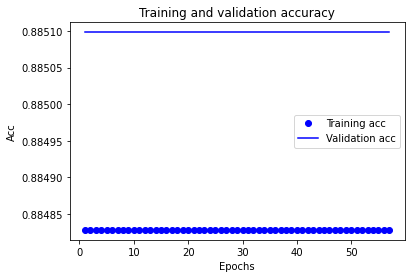

In [30]:
history_dict = history.history
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()